# Dimer binder

This document is to find if dimer ZincFingers can bind to DNA behaved just like monomer

In [32]:
using Pkg; Pkg.activate(".")
using Plots
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include("bnc_initialize.jl")

  Activating project at `/mnt/d/Non-implementary-index/bnc_julia`


show_qK_space_conditions (generic function with 1 method)

In [3]:
using DataInterpolations

## Define the species, make the atomic species first

In [4]:
"""
AA: Dimer ZincFinger A₁A₂
D: DNA
A₁D: Only A₁ binds to D
A₂D: Only A₂ binds to D
AAD: Both A₁ and A₂ bind to D
A₁DA₂: two AA, one binds to D by A₁, the other binds to D by A₂
"""
x_sym = ["AA", "D", "A₁D", "A₂D", "AAD", "A₁DA₂"] .|> Symbolics.variable
q_sym = ["tAA", "tD"] .|> Symbolics.variable
K_sym = ["k₁", "k₂", "k₃", "k₄"] .|> Symbolics.variable

4-element Vector{Num}:
 k₁
 k₂
 k₃
 k₄

In [85]:
N

6×6 Matrix{Int64}:
 1  1  -1   0   0   0
 1  1   0  -1   0   0
 0  0   1   0  -1   0
 0  0   0   1  -1   0
 1  0   1   0   0  -1
 1  0   0   1   0  -1

In [96]:
_Mtx2idx_val(_idx_val2Mtx([1,4],1,4))

([1, 4], [1, 1])

In [84]:
arr_to_vector(N)

6-element Vector{Vector{Int64}}:
 [1, 1, -1, 0, 0, 0]
 [1, 1, 0, -1, 0, 0]
 [0, 0, 1, 0, -1, 0]
 [0, 0, 0, 1, -1, 0]
 [1, 0, 1, 0, 0, -1]
 [1, 0, 0, 1, 0, -1]

In [81]:
    #"AA", "D", "A₁D", "A₂D", "AAD", "A₁DA₂"
N = [1     1     -1     0      0      0
     1     1     0     -1      0      0
     0     0     1     0     -1       0
     0     0     0     1      -1      0
     1     0     1     0      0      -1
     1     0     0     1      0      -1
]

Model = Bnc(N=N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

solution = x_traj_with_qK_change(Model, randomize(6), randomize(6); input_logspace=false,output_logspace=true)

┌ Warning: N has been reduced from 6 to 4 rows, for linear dependent.
└ @ Main /mnt/d/Non-implementary-index/bnc_julia/functions.jl:154


retcode: Success
Interpolation: 1st order linear
t: 121-element Vector{Float64}:
 0.0
 0.02958603144603041
 0.05646095155590508
 0.08611838771785835
 0.11454685105040363
 0.14240090114873832
 0.16851631388540997
 0.192757631662767
 0.21467749304288988
 0.2311528368631781
 0.2439616797223459
 0.2535223648354853
 0.26052275439653777
 ⋮
 0.8336130089104321
 0.8487144749480917
 0.8649179971312287
 0.87897458185197
 0.8939850618947671
 0.9089521919878301
 0.9248363861308926
 0.9414926014651243
 0.9593027936551551
 0.9781259158047931
 0.9975016866353668
 1.0
u: 121-element Vector{Vector{Float64}}:
 [-14.032664018113826, 3.8802756624095935, -4.310960747333587, -15.22379547565933, 0.3220704351235937, -13.239861792390764]
 [-13.148341184527546, 3.6431066563190857, -3.940532492829774, -14.394390309081247, 0.462462843239796, -12.268965599148588]
 [-12.344863881591182, 3.427477145632412, -3.6040525692340624, -13.640991750528565, 0.5899862190351806, -11.386852268839988]
 [-11.457707612277128, 3.189

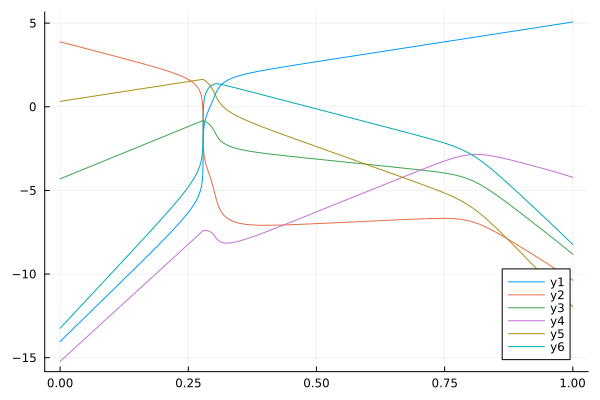

In [83]:
plot(solution.t, stack(solution.u)')

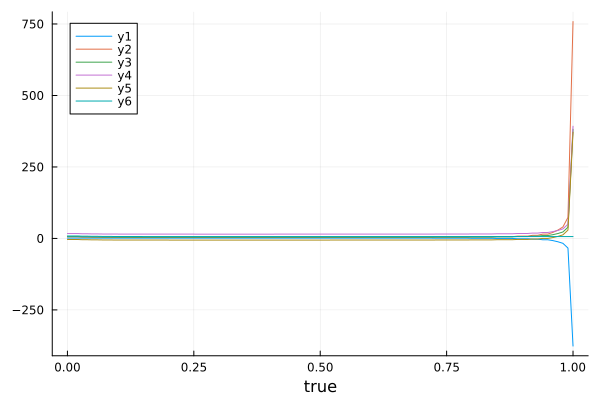

In [78]:
plot(solution(0:0.01:1,Val{1}))

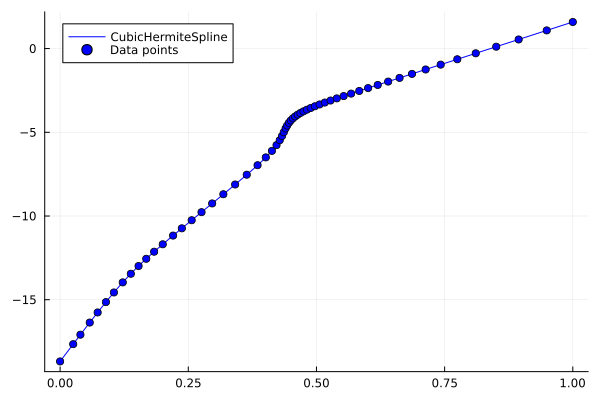

In [24]:
A = PCHIPInterpolation(stack(solution.u)[1,:], solution.t)
plot(A)

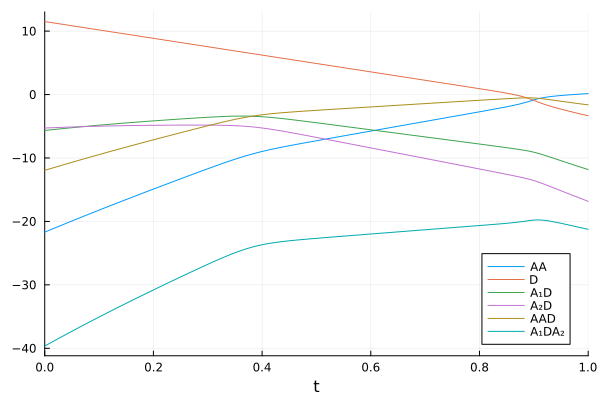

In [148]:
plot(solution,labels=[Model.x_sym;]')

In [156]:
xs = [1,2,3,4,5]
A = [4,2,3,5,1]

5-element Vector{Int64}:
 4
 2
 3
 5
 1

In [ ]:
test = interpolate(xs,A, BSpline(Cubic()))

In [173]:
interp_linear = linear_interpolation(xs, A)
interp_cubic = cubic_spline_interpolation(1:5, A)
interp_linear_extrap = linear_interpolation(xs, A, extrapolation_bc=Line())

5-element extrapolate(interpolate((::Vector{Int64},), ::Vector{Int64}, Gridded(Linear())), Line()) with element type Float64:
 Ratios.SimpleRatio{Int64}(4, 1)
 Ratios.SimpleRatio{Int64}(2, 1)
 Ratios.SimpleRatio{Int64}(3, 1)
 Ratios.SimpleRatio{Int64}(5, 1)
 Ratios.SimpleRatio{Int64}(1, 1)

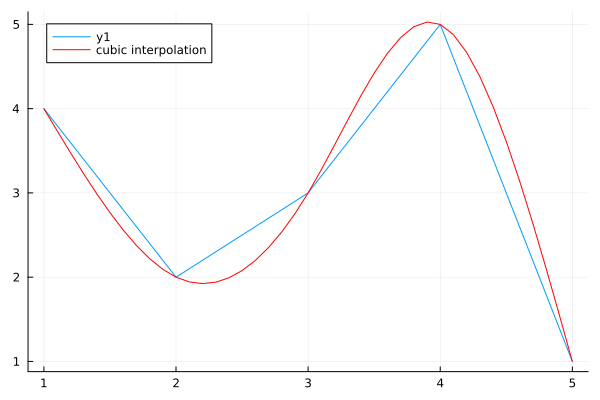

In [179]:
plot(xs,A)
plot!(1:0.1:5, interp_cubic(1:0.1:5), label="cubic interpolation", color=:red)

In [168]:
interp_linear = extrapolate(scale(interpolate(A, BSpline(Linear())), xs), Line())

LoadError: MethodError: no method matching scale(::Interpolations.BSplineInterpolation{Float64, 1, Vector{Float64}, BSpline{Linear{Throw{OnGrid}}}, Tuple{Base.OneTo{Int64}}}, ::Vector{Int64})
The function `scale` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  scale(::AbstractInterpolation{T, N, IT}, [91m::NTuple{N, var"#s217"} where var"#s217"<:AbstractRange[39m) where {T, N, IT}
[0m[90m   @[39m [36mInterpolations[39m [90m~/.julia/packages/Interpolations/91PhN/src/scaling/[39m[90m[4mscaling.jl:31[24m[39m
[0m  scale(::AbstractInterpolation{T, N, IT}, [91m::AbstractRange...[39m) where {T, N, IT}
[0m[90m   @[39m [36mInterpolations[39m [90m~/.julia/packages/Interpolations/91PhN/src/scaling/[39m[90m[4mscaling.jl:27[24m[39m


In [4]:
f1 = function (a)
    @. a/2 * (a/2-1)^(-(a+1)/a)
end

#5 (generic function with 1 method)

In [5]:
f2 = function (a)
   @. 2*a / (a-2)^((a+1)/a)
end

#7 (generic function with 1 method)

In [16]:
f = function (m)
    (sqrt(m)+sqrt(m\1))^2
end

#9 (generic function with 1 method)

In [21]:
g = function (m)
    (3 * m^2)/(4+2m)
end

#11 (generic function with 1 method)

In [12]:
using Pkg;Pkg.activate(".")
using Plots

  Activating project at `/mnt/d/Non-implementary-index/bnc_julia`


In [19]:
 f.(0.01:0.01:10) |> minimum

4.0

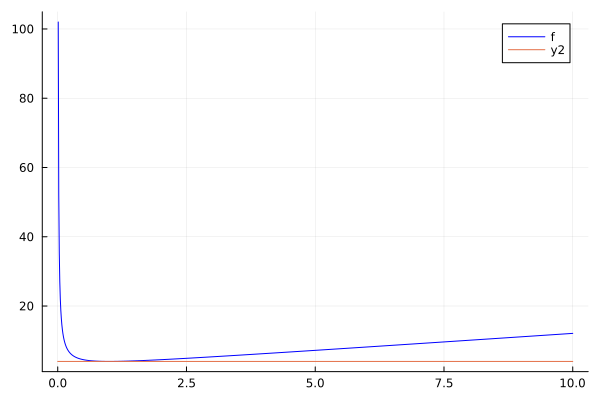

In [20]:
plot(0.01:0.01:10, f.(0.01:0.01:10), label="f", color=:blue)
plot!([0,10],[4,4])

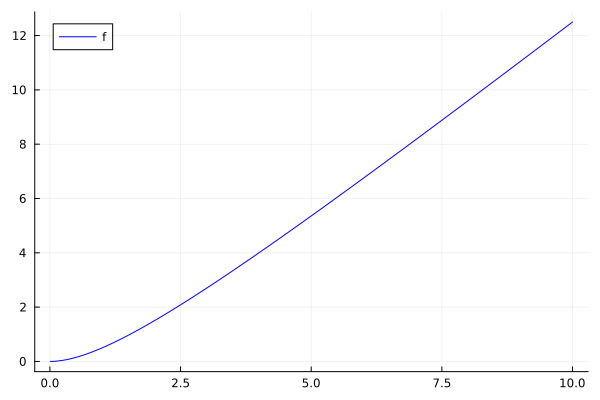

In [27]:
plot(0.01:0.01:10, g.(0.01:0.01:10), label="f", color=:blue)

In [29]:
findfirst(x->x>4,g.(0.01:0.01:10))

401

In [30]:
(0.01:0.01:10)[400]

4.0

In [31]:
g(4.0)

4.0

In [8]:
f2(3:5)

3-element Vector{Float64}:
 6.0
 3.3635856610148585
 2.675805205867436

In [48]:
true && println("N is linear independent")

N is linear independent


In [62]:
A = rand(2,3).-0.5
A = [A ; A[1,:]']

3×3 Matrix{Float64}:
 0.18915   -0.229577  -0.379614
 0.169526   0.350108  -0.434564
 0.18915   -0.229577  -0.379614

In [63]:
lu(A,check=false)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0       0.0  0.0
 0.896253  1.0  0.0
 1.0       0.0  1.0
U factor (rank-deficient):
3×3 Matrix{Float64}:
 0.18915  -0.229577  -0.379614
 0.0       0.555867  -0.0943339
 0.0       0.0        0.0

In [24]:
Symbolics.Variable("X", 2)

X₂

In [ ]:
        #         D, Tal, TF TalD TFD
N_comp_binding = [1  1    0   -1    0
                  1  0    1   0    -1]

model2 = Bnc(N = N_comp_binding, x_sym= )